In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np

In [3]:
variation_test_csv = pd.read_csv('csv_files/df_final_experiment_clients.txt')

In [4]:
variation_test_csv.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
footprint1_csv = pd.read_csv('csv_files/df_final_web_data_pt_1.txt')

In [6]:
footprint1_csv.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [7]:
footprint2_csv = pd.read_csv('csv_files/df_final_web_data_pt_2.txt')

In [8]:
footprint2_csv.shape

(412264, 5)

In [9]:
footprint2_csv.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [10]:
customer_csv = pd.read_csv('csv_files/df_final_demo.txt')

In [11]:
customer_csv.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


# Limpieza pre-unión de DataFrames

- **Eliminamos clientes con valores nulos en la columna 'clnt_tenure_yr'**

In [12]:
null_years_client= customer_csv["clnt_tenure_yr"].isna().sum()
customer_csv = customer_csv.dropna(subset=['clnt_tenure_yr'])
print(f"Había {null_years_client} filas con valores nulos que se han eliminado")

Había 14 filas con valores nulos que se han eliminado


- **Renombramos la columna 'Variation' pasándola a 'variation'**: 

In [13]:
variation_test_csv.rename(columns={'Variation': 'variation'}, inplace=True)

- **Eliminamos las filas con valores nulos en la columna 'variation'**

In [14]:
nulos_var= variation_test_csv["variation"].isna().sum()
print(f"Había {nulos_var} filas con valores nulos que se han eliminado")
variation_test_csv = variation_test_csv.dropna(subset=['variation'])
variation_test_csv

Había 20109 filas con valores nulos que se han eliminado


,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


- **Renombramos los valores que aparecen dentro de 'variation'**: Los convertimos en valores booleanos 

In [15]:
variation_test_csv["variation"].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [16]:
variation_replace = {"Test": 1, "Control": 0}
variation_test_csv["variation"]= variation_test_csv["variation"].replace(variation_replace)

C:\Users\greta\AppData\Local\Temp\ipykernel_13780\2264563777.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  variation_test_csv["variation"]= variation_test_csv["variation"].replace(variation_replace)


In [17]:
variation_test_csv["variation"].value_counts()

variation
1    26968
0    23532
Name: count, dtype: int64

# Unión de DataFrames

- **Concatenamos footprints**: 

In [18]:
footprint_csv = pd.concat([footprint1_csv, footprint2_csv], ignore_index=True)

In [19]:
footprint_csv.head(5)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


- **Corregimos los nombres de los pasos en process_step**: Ahora que tenemos juntos los dos data sets de footprints

In [20]:
footprint_csv["process_step"].value_counts() 

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [21]:
process_replace = {"start": 0, "step_1": 1, "step_2": 2, "step_3": 3, "confirm": 4}
footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)

C:\Users\greta\AppData\Local\Temp\ipykernel_13780\2737519529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  footprint_csv["process_step"]= footprint_csv["process_step"].replace(process_replace)


- **Hacemos merge del DataFrame de variations con el de footprint**: Usando el valor común del client_id

In [22]:
df=pd.merge(footprint_csv, variation_test_csv, on='client_id', how='left')    
df.head(5)
#podemos ver que al haber valores NaN en la columna variation, 
# los valores se habrían convertido en float si hubieran sido int

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1.0


In [23]:
# este es el df de aquellos clientes que no tienen asignado un valor en la columna variation
# con lo cual no aportan información en cuanto al AB testing
missing_variation = footprint_csv[~footprint_csv['client_id'].isin(variation_test_csv['client_id'])]
missing_variation.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time
570413,6567540,479729771_88531584407,650524149_49721262718_438846,0,2017-05-11 16:55:02
449859,8560931,989174721_60455842986,294988077_77454122102_613061,0,2017-06-19 09:53:12
514513,7466130,508634604_28544701148,971357903_35090968753_467605,0,2017-06-04 08:46:55
551681,2721275,132727523_37086187052,804851889_50013772482_769963,4,2017-06-08 09:59:55
445532,8975226,274682354_38289606135,681759860_5845200206_792412,4,2017-06-13 14:56:29


- **Hacemos el merge que queda**: Volvemos a usar client_id como punto de unión.

In [24]:
df=pd.merge(df,customer_csv, on='client_id', how='left')
#hacemos merge del último data set que quedaba 
df.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
415288,2096040,165783277_38163496070,176789302_77796058441_27606,1,2017-06-19 15:44:18,1.0,4.0,58.0,32.0,F,2.0,45520.00,1.0,4.0
64750,9319290,615230253_42561323769,920596677_48893013082_36183,2,2017-04-05 19:22:11,1.0,14.0,168.0,36.5,M,2.0,56264.07,5.0,8.0
655458,8959650,303039122_79137557422,727470105_59101336611_348361,0,2017-06-15 16:14:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173384,3443063,914668255_65413878437,766282010_26050576327_11828,4,2017-04-05 19:48:07,1.0,8.0,99.0,35.5,U,2.0,28271.10,5.0,8.0
532092,2822818,678200341_73189003604,8220437_71432782857_989652,1,2017-05-28 15:58:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = df.reset_index(drop=True)  # drop=True elimina el índice anterior


In [26]:
df.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
5,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:17:15,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
6,9988021,580560515_7732621733,781255054_21935453173_531117,1,2017-04-17 15:17:01,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
7,9988021,580560515_7732621733,781255054_21935453173_531117,0,2017-04-17 15:16:22,1.0,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,4,2017-04-05 13:10:05,1.0,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,3,2017-04-05 13:09:43,1.0,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0


# Limpieza y control de los datos post merge

- **Limpieza de valores nulos en variation**: Al ser un dato crucial no nos aporta información valiosa una fila de cliente sin este dato.
Eliminamos las filas con valores nulos en variation con la seguridad de que están guardados en missing_variation

In [27]:
nulos_var_df= df["variation"].isna().sum()
print(f"Había {nulos_var_df} filas con valores nulos que se han eliminado")
df.dropna(subset=['variation'],inplace=True)
variation_test_csv.sample(5)

Había 434096 filas con valores nulos que se han eliminado


,client_id,variation
19696,108335,0
45486,8303095,1
28096,2942135,1
33657,1768907,0
42994,4478568,1


- **Limpieza de valores nulos en clnt_tenure_yr**

In [28]:
nulos_yr_df= df["clnt_tenure_yr"].isna().sum()
print(f"Había {nulos_yr_df} filas con valores nulos que se han eliminado")
df = df.dropna(subset=['clnt_tenure_yr'])

Había 102 filas con valores nulos que se han eliminado


- **Conversión a int de floats**

In [29]:
df["clnt_tenure_yr"] = df["clnt_tenure_yr"].astype(int)
df["clnt_tenure_mnth"] = df["clnt_tenure_mnth"].astype(int)
df["num_accts"] = df["num_accts"].astype(int)
df["variation"] = df["variation"].astype(int)
df["calls_6_mnth"] = df["calls_6_mnth"].astype(int)
df["logons_6_mnth"] = df["logons_6_mnth"].astype(int)

- **Examinamos los valores nulos**

In [30]:
df.isnull().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
variation            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age            12
gendr                0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
dtype: int64

# Creación de rangos de edades

In [31]:
#falta por hacer

# Análisis de los clientes



- **Examinamos la edades**: Se comprueba que no existan edades que no tengan sentido y se crea un grupo con los outliers que nos interesen para poder analizarlo.

In [32]:
outliers_age = df[(df['clnt_age'] < 18) | (df['clnt_age'] > 95)]
outliers_grouped = outliers_age[['client_id', 'clnt_age']].drop_duplicates()

#podemos ver que hay clientes menores de 18, qué hacer con eso? 
outliers_grouped

,client_id,clnt_age
14509,7953598,17.5
24437,5114008,17.5
33734,4996294,17.5
37287,7128753,17.5
38951,1273146,17.5
...,...,...
226347,8927242,17.5
236209,2064675,17.5
415436,9206649,96.0
492703,2364116,17.0


- **Creación de un df en el que analizar únicamente el tipo de cliente que nos interesa**

In [33]:
client_analysis_df = df.dropna().copy()
client_analysis_df.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
132513,7201494,87009839_6433861547,86888688_54799184655_264950,1,2017-04-07 14:07:19,1,16,194,53.0,F,2,30927.12,2,5
189505,2822156,387556573_99748392946,239214723_57475347343_22108,0,2017-04-06 10:45:49,0,16,193,45.0,F,2,44508.47,4,7
16167,3149390,908115994_29347356729,34024872_19369170144_627473,2,2017-04-12 11:06:50,0,13,160,35.5,F,2,134006.95,6,9
425693,8883914,665463183_67216420823,203903075_2508198861_612644,4,2017-05-02 12:01:07,0,5,69,23.0,U,2,35466.55,2,5
132366,739806,325604820_27685244035,994244764_2884521036_283303,1,2017-04-23 16:07:35,1,15,189,50.5,F,2,687493.55,6,9


- **Creamos un group by client_id.** Ya que no interesa para el analisis del tipo de cliente que haya más de una fila por cada cliente, datos del tipo edad, genero, etc, no van a verse afectados por la columna date_time.

In [34]:
unique_client_analysis_df = client_analysis_df.groupby('client_id').agg({
    'gendr': 'last',  # He comprobado que no haya clientes que cambien pero por si acaso
    'clnt_age': 'first',             
    'logons_6_mnth': 'first', 
    'clnt_tenure_yr':'first',
    'clnt_tenure_mnth': 'first',
    'num_accts':'first',
    'bal':'first',
    'calls_6_mnth':'first',
    'logons_6_mnth':'first'    
}).reset_index()
unique_client_analysis_df.sample(5)


,client_id,gendr,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
3702,734032,U,28.5,8,6,72,2,49861.01,5
49288,9749516,U,55.5,8,5,71,3,209940.33,4
15218,3031632,M,44.0,5,13,162,2,68891.84,2
34399,6807449,M,68.0,9,18,220,2,220899.06,6
3417,674671,U,60.0,9,7,84,2,49350.46,6


- **Hacemos un describe para entender los datos.** A grandes rasgos, y sin haber entrado todavía a limpiar en profundidad.

In [35]:
unique_client_analysis_df.describe()

,client_id,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000
mean,5.006180e+06,47.319795,6.131856,12.031810,150.416365,2.254580,1.495168e+05,3.093272
std,2.877445e+06,15.518616,2.175441,6.860326,81.945403,0.533675,3.020390e+05,2.188009
min,5.550000e+02,17.000000,3.000000,2.000000,33.000000,1.000000,2.378944e+04,0.000000
25%,2.515688e+06,33.500000,4.000000,6.000000,82.000000,2.000000,3.987718e+04,1.000000
50%,5.025043e+06,48.000000,6.000000,11.000000,136.000000,2.000000,6.573433e+04,3.000000
75%,7.477922e+06,59.500000,8.000000,16.000000,192.000000,2.000000,1.399583e+05,5.000000
max,9.999832e+06,96.000000,9.000000,55.000000,669.000000,7.000000,1.632004e+07,6.000000


- **Creamos unas gráficas que nos ayuden a entender los datos.**

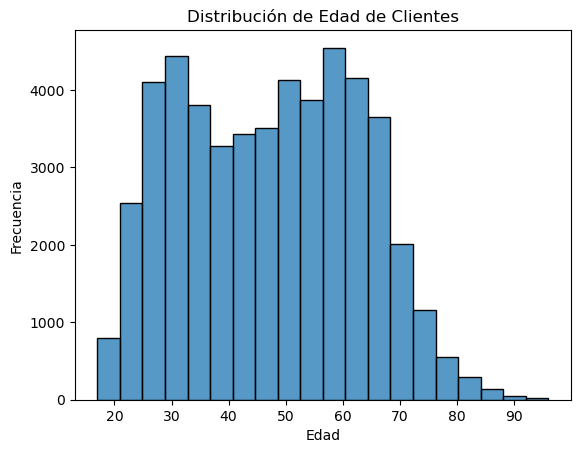

In [36]:
sns.histplot(unique_client_analysis_df['clnt_age'], bins=20)
plt.title('Distribución de Edad de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

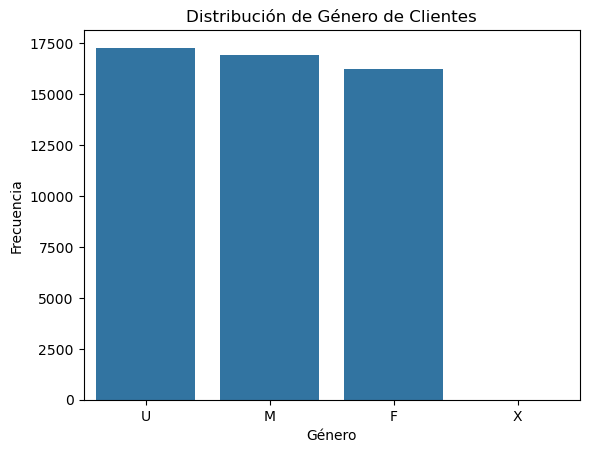

In [37]:
sns.countplot(data=unique_client_analysis_df, x='gendr')
plt.title('Distribución de Género de Clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

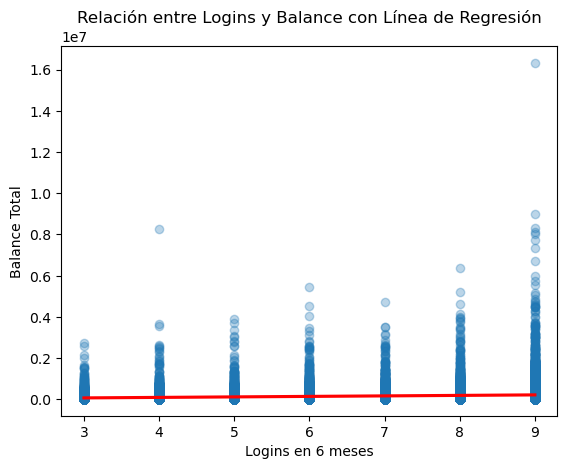

In [38]:
sns.regplot(data=unique_client_analysis_df, x='logons_6_mnth', y='bal', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relación entre Logins y Balance con Línea de Regresión')
plt.xlabel('Logins en 6 meses')
plt.ylabel('Balance Total')
plt.show()

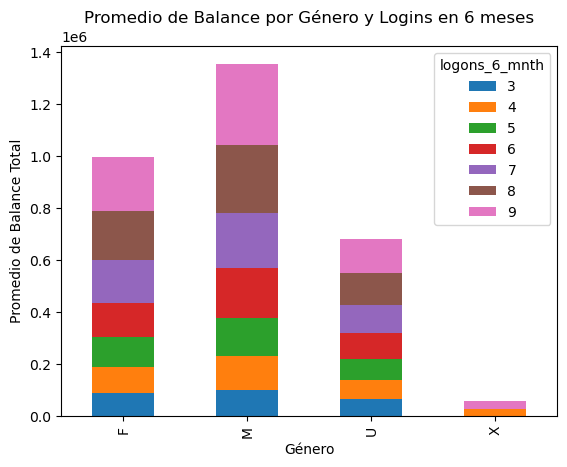

In [39]:
balance_gender_logons = unique_client_analysis_df.groupby(['gendr', 'logons_6_mnth'])['bal'].mean().unstack()

# Gráfico de barras apiladas
balance_gender_logons.plot(kind='bar', stacked=True)
plt.title('Promedio de Balance por Género y Logins en 6 meses')
plt.xlabel('Género')
plt.ylabel('Promedio de Balance Total')
plt.show()

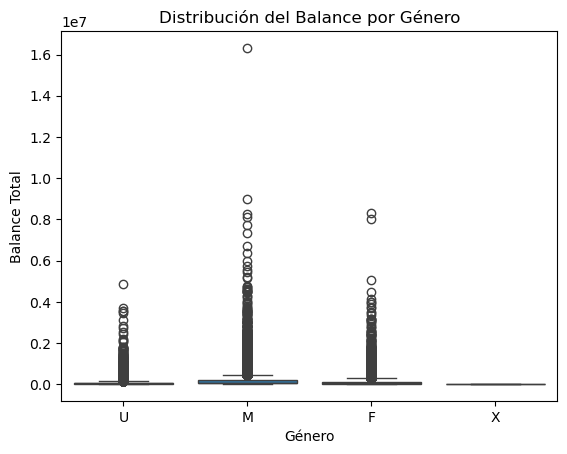

In [40]:
sns.boxplot(data=unique_client_analysis_df, x='gendr', y='bal')
plt.title('Distribución del Balance por Género')
plt.xlabel('Género')
plt.ylabel('Balance Total')
plt.show()

- **Analizamos Skewness y Kurtosis de algunos datos**

In [41]:
skewness_bal = unique_client_analysis_df['bal'].skew()
kurtosis_bal = unique_client_analysis_df['bal'].kurtosis()

print(f'skewness del balance: {skewness_bal}, hay un número significativo de clientes con balances muy altos')
print(f'Kurtosis del balance: {kurtosis_bal}, la distribución tiene una cantidad inusualmente alta de outliers.')

skewness_years = unique_client_analysis_df['clnt_tenure_yr'].skew()
kurtosis_years = unique_client_analysis_df['clnt_tenure_yr'].kurtosis()

print(f'skewness del clnt_tenure_yr: {skewness_years} hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes')
print(f'Kurtosis del clnt_tenure_yr: {kurtosis_years}, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media')

skewness del balance: 11.47407650252342, hay un número significativo de clientes con balances muy altos
Kurtosis del balance: 294.1124758573803, la distribución tiene una cantidad inusualmente alta de outliers.
skewness del clnt_tenure_yr: 1.0317878940266119 hay un grupo pequeño de clientes leales que han estado mucho más tiempo en comparación con los nuevos clientes
Kurtosis del clnt_tenure_yr: 1.0179025974588907, hay menos outliers en comparación con una distribución normal. La mayoría de los datos están más concentrados alrededor de la media


- **Investigamos quiénes serían nuestros clientes VIP, estándar y otros:**
Según el balance en las cuentas y número de cuentas

In [42]:
unique_client_analysis_df.sort_values('bal', ascending=False).head(10)

,client_id,gendr,clnt_age,logons_6_mnth,clnt_tenure_yr,clnt_tenure_mnth,num_accts,bal,calls_6_mnth
46967,9286288,M,62.5,9,21,254,3,16320040.15,6
35733,7070097,M,53.0,9,11,133,2,8986419.77,6
47748,9440656,F,63.0,9,7,94,2,8292996.21,6
11501,2291985,M,41.0,4,7,85,2,8247729.97,1
8399,1678193,M,65.5,9,24,299,3,8137343.24,6
34140,6762377,F,41.5,9,16,193,3,8045102.60,6
17642,3519657,M,66.5,9,18,218,6,7741994.01,6
4950,987970,M,74.5,9,14,179,3,7339443.17,4
4313,857273,M,56.5,9,31,376,5,6716305.28,6
46993,9290030,M,67.5,8,28,341,4,6353000.43,5


In [43]:
# percentiles altos del balance de las cuentas y número de ellas para VIP, estándar o nada
percentile_85_bal = df['bal'].quantile(0.85)
percentile_85_accts = df['num_accts'].quantile(0.85)

percentile_40_bal = df['bal'].quantile(0.40)
percentile_40_accts = df['num_accts'].quantile(0.40)

# función para clasificar los clientes
def class_client(df):
    if df['bal'] >= percentile_85_bal and df['num_accts'] >= percentile_85_accts:
        return 0 #vip
    elif df['bal'] >= percentile_40_bal and df['num_accts'] >= percentile_40_accts:
        return 1 #estándar
    else:
        return 2 #nada
    
df['client_type'] = df.apply(class_client, axis=1)

df.sample(5)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_type
222464,3975699,28653710_16243361182,885286311_49121866857_416009,0,2017-04-16 14:33:13,0,14,176,42.5,F,2,86596.45,3,6,1
87905,2806397,512210924_5640787296,466316026_28072861707_236119,2,2017-03-29 11:30:38,0,5,71,48.5,U,3,400173.40,4,7,0
612702,3461116,155580104_38342652791,976461818_33621966743_74899,2,2017-05-19 00:38:02,0,8,101,32.0,F,2,120169.72,2,5,1
108096,1025467,74887680_49408715916,241671760_20956043516_790737,0,2017-04-05 15:38:55,1,9,115,68.0,F,2,33797.94,2,5,2
37047,5257165,612775456_55758832244,831117845_77136937059_15405,1,2017-03-30 20:06:42,1,6,78,53.5,U,2,26349.53,0,3,2


- **A pesar de que los clientes VIP tienen de media un balance mucho mayor, los clientes estándar acumulan más balance como grupo**


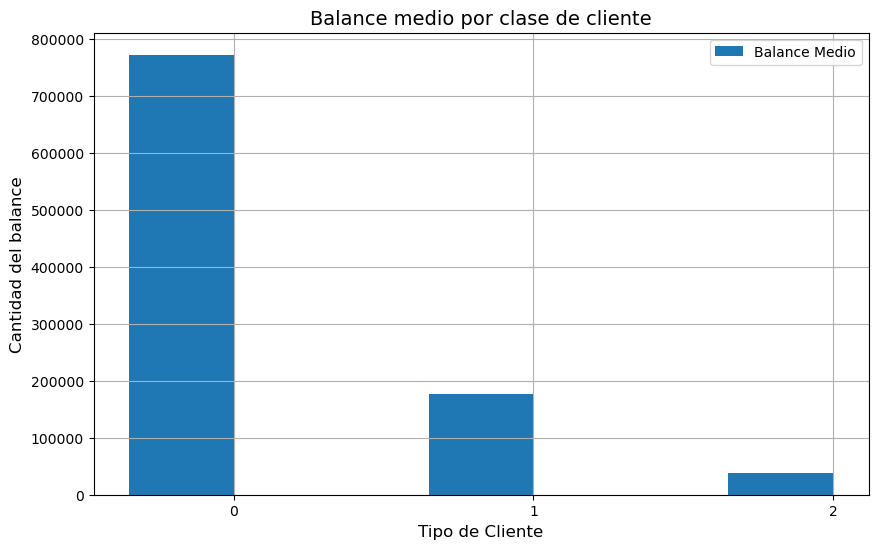

In [44]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_type_mean = df.groupby('client_type').agg(
    bal_mean=('bal', 'mean'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_type_mean))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_type_mean['bal_mean'], bar_width, label='Balance Medio')

# Personalización del gráfico
plt.title('Balance medio por clase de cliente', fontsize=14)
plt.ylabel('Cantidad del balance', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_type_mean['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

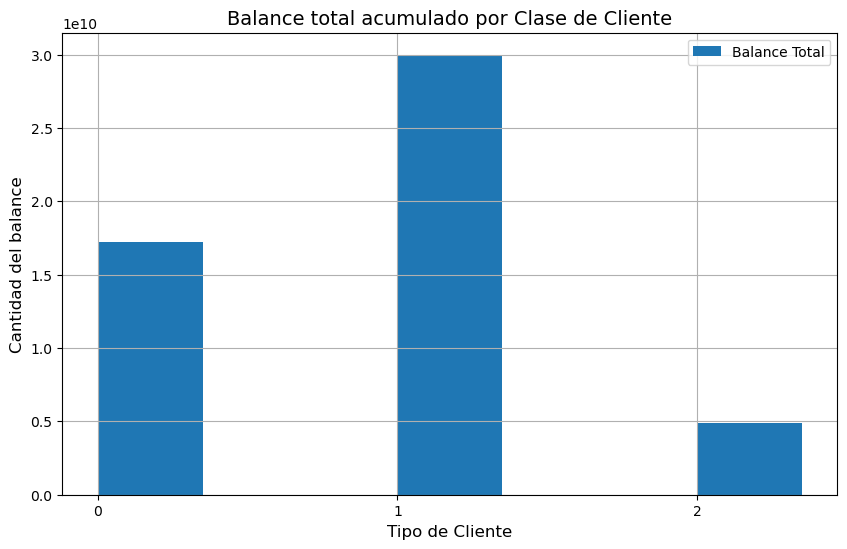

In [45]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_type_sum = df.groupby('client_type').agg(
    bal_sum=('bal', 'sum')
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_type_sum))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices + bar_width, metrics_type_sum['bal_sum'], bar_width, label='Balance Total')

# Personalización del gráfico
plt.title('Balance total acumulado por Clase de Cliente', fontsize=14)
plt.ylabel('Cantidad del balance', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_type_sum['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

- **Vemos el mismo gráfico con respecto a número de cuentas**

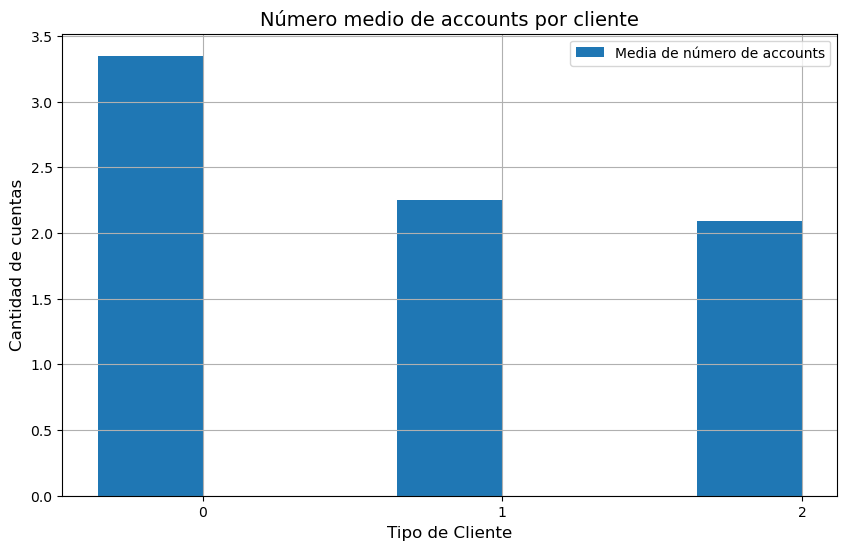

In [46]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_accts_mean = df.groupby('client_type').agg(
    accts_mean=('num_accts', 'mean'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_accts_mean))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_accts_mean['accts_mean'], bar_width, label='Media de número de accounts')

# Personalización del gráfico
plt.title('Número medio de accounts por cliente', fontsize=14)
plt.ylabel('Cantidad de cuentas', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_accts_mean['client_type'])  # Etiquetas centradas
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

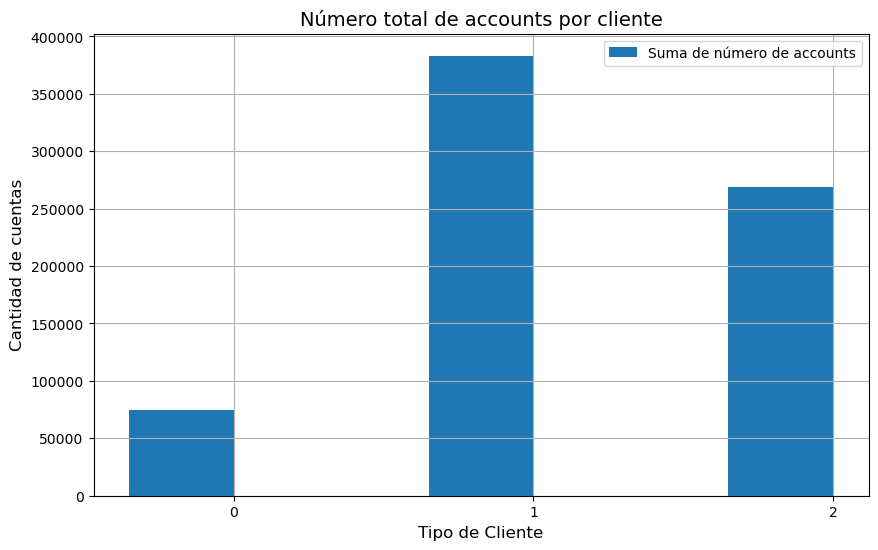

In [47]:
# Agrupar los datos por 'client_type' y calcular el balance promedio y total
metrics_accts_sum = df.groupby('client_type').agg(
    accts_sum=('num_accts', 'sum'),
).reset_index()

# Configuración del gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Ancho de las barras
indices = np.arange(len(metrics_accts_sum))  # Posiciones de las barras en el eje X

# Crear las barras para el balance promedio y el balance total
plt.bar(indices, metrics_accts_sum['accts_sum'], bar_width, label='Suma de número de accounts')

# Personalización del gráfico
plt.title('Número total de accounts por cliente', fontsize=14)
plt.ylabel('Cantidad de cuentas', fontsize=12)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.xticks(indices + bar_width / 2, metrics_accts_sum['client_type'])  
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()

- **Limpieza de gender**: Se examinan los distintos valores de gender que hay en el data set.

In [48]:
unique_client_analysis_df['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

# Comprobaciones del Funcionamiento

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre el género y la variation

In [49]:
contingency_table_gender_variation = pd.crosstab(client_analysis_df['gendr'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_gender_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_gender_variation)

Chi2: 0.00034921226276692855, P-value: 0.9999982645682544
Tabla de Contingencia Normalizada:
variation         0         1
gendr                        
F          0.318846  0.329411
M          0.336962  0.335739
U          0.344193  0.334805
X          0.000000  0.000045


In [50]:
# Calcular los grados de libertad gender_variation
n_rows_gender_var = contingency_table_gender_variation.shape[0]  # Número de filas
n_col_gender_var = contingency_table_gender_variation.shape[1]  # Número de columnas

df_gender_var = (n_rows_gender_var - 1) * (n_col_gender_var - 1)

# Definir nivel de significancia 
alpha = 0.05

# Calcular el valor crítico 
valor_critico_gender_var = stats.chi2.ppf(1 - alpha, df_gender_var)
valor_critico_gender_var

7.814727903251179

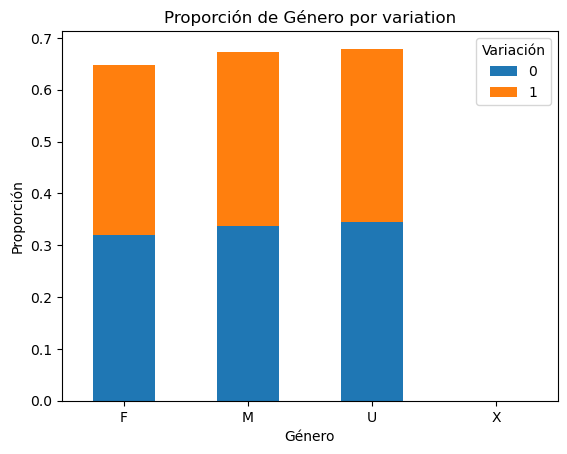

In [51]:
contingency_table_gender_variation.plot(kind='bar', stacked=True)
plt.title('Proporción de Género por variation')
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Variación')
plt.show()

- **Confirmamos que es un test ciego**: Se comprueba que no exista relación entre la edad y la variation

In [52]:
contingency_table_age_variation = pd.crosstab(client_analysis_df['clnt_age'], client_analysis_df['variation'], normalize='columns')
chi2, p, dof, expected = chi2_contingency(contingency_table_age_variation)
print(f'Chi2: {chi2}, P-value: {p}')
print("Tabla de Contingencia Normalizada:")
print(contingency_table_age_variation)

Chi2: 0.016614219813777472, P-value: 1.0
Tabla de Contingencia Normalizada:
variation         0         1
clnt_age                     
17.0       0.000077  0.000045
17.5       0.001255  0.001305
18.0       0.001234  0.000787
18.5       0.001764  0.002565
19.0       0.001395  0.001451
...             ...       ...
93.5       0.000223  0.000000
94.0       0.000084  0.000073
94.5       0.000000  0.000028
95.5       0.000000  0.000034
96.0       0.000028  0.000034

[158 rows x 2 columns]


In [53]:
# Calcular los grados de libertad
n_rows_age_variation = contingency_table_age_variation.shape[0]  # Número de filas
n_col_age_variation = contingency_table_age_variation.shape[1]  # Número de columnas

df_age_variation = (n_rows_age_variation - 1) * (n_col_age_variation - 1)

In [54]:
# Definir nivel de significancia
alpha = 0.05

# Calcular el valor crítico
valor_critico_age_variation = stats.chi2.ppf(1 - alpha, df_age_variation)
valor_critico_age_variation

187.23886994495388

- **Tiempo transcurrido en cada paso**: Se registra cuánto tiempo se ha pasado en cada paso según la variation y el cliente.

Empezamos por step y variation y más adelante lo relacionamos con el cliente

In [55]:
df = df.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'date_time'])
df['date_time'] = pd.to_datetime(df['date_time'])
df['time_diff'] = df.groupby(['client_id', 'visitor_id', 'visit_id'])['date_time'].diff(-1).abs()
df = df.dropna(subset=['time_diff'])
df['time_in_step'] = df['time_diff'].shift(1)
df = df.dropna(subset=['time_in_step'])


- **En este gráfico con 100 medidas al azar por paso podemos ver que hay algunos outliers pero se observan diferencias entre las variaciones A y B y el tiempo pasado en los pasos**

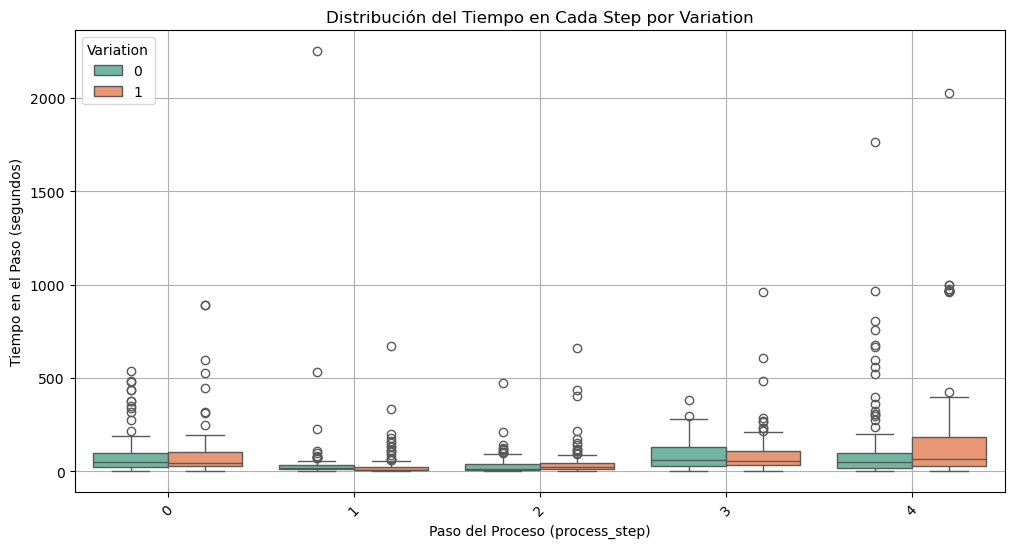

In [56]:

# 'time_in_step' en segundos
df['time_in_step'] = df['time_in_step'].dt.total_seconds()


# Seleccionamos 100 valores aleatorios del tiempo en cada step y cada variation
sampled_data = df.groupby(['process_step', 'variation'])['time_in_step'].apply(
    lambda x: x.sample(min(100, len(x)), random_state=1)
).reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='process_step', y='time_in_step', hue='variation', data=sampled_data, palette='Set2')
plt.title('Distribución del Tiempo en Cada Step por Variation')
plt.xlabel('Paso del Proceso (process_step)')
plt.ylabel('Tiempo en el Paso (segundos)')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.grid(True)
plt.show()


In [57]:
result = df.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
result = result.rename(columns={'time_in_step': 'avg_time_in_step'})
result

,process_step,variation,avg_time_in_step
0,0,0,125.638498
1,0,1,125.224943
2,1,0,44.111927
3,1,1,37.767317
4,2,0,38.557394
5,2,1,47.706896
6,3,0,92.143441
7,3,1,95.470857
8,4,0,142.663516
9,4,1,182.905880


In [58]:
# detectar outliers y definirlos
Q1 = df['time_in_step'].quantile(0.25)
Q3 = df['time_in_step'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# eliminar outliers
df_filtered = df[(df['time_in_step'] >= lower_bound) & (df['time_in_step'] <= upper_bound)]

clean_result = df_filtered.groupby(['process_step', 'variation'])['time_in_step'].mean().reset_index()
clean_result = clean_result.rename(columns={'time_in_step': 'avg_time_in_step'})
clean_result

,process_step,variation,avg_time_in_step
0,0,0,49.899434
1,0,1,54.505345
2,1,0,28.734775
3,1,1,22.732101
4,2,0,31.643856
5,2,1,33.864009
6,3,0,65.741827
7,3,1,67.332952
8,4,0,53.773585
9,4,1,59.149376


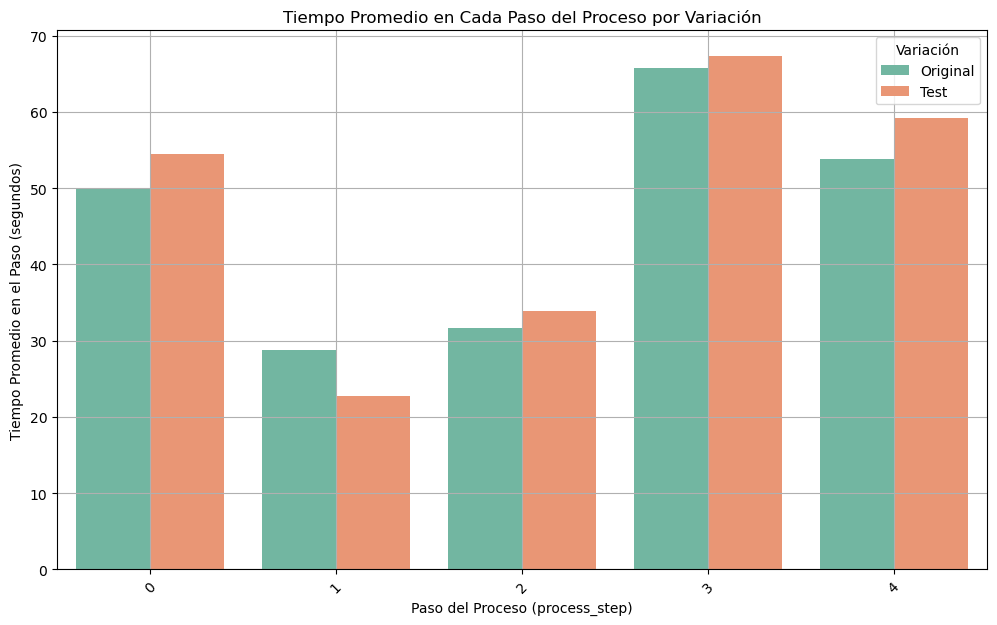

In [59]:

# Creamos el gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x='process_step', y='avg_time_in_step', hue='variation', data=clean_result, palette='Set2')

# Configuración del gráfico
plt.title('Tiempo Promedio en Cada Paso del Proceso por Variación')
plt.xlabel('Paso del Proceso (process_step)')
plt.ylabel('Tiempo Promedio en el Paso (segundos)')
plt.xticks(rotation=45)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Original', 'Test'], title='Variación')
plt.grid(True)


# Mostramos el gráfico
plt.show()

- **Veces que se ha completado el proceso**: Se registra cuántas veces por variation se ha llegado al último paso del proceso. 

In [60]:
df_process_step_variation = df[df['process_step']==4].groupby('variation').count()
df_process_step_variation

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_type,time_diff,time_in_step
variation,,,,,,,,,,,,,,,,
0,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116,2116
1,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218,4218


In [61]:
df_process_step_variation = df[df['process_step'] == 4]

count_unique_visits = df_process_step_variation.groupby('variation')['visit_id'].nunique().reset_index()

count_unique_visits.columns = ['variation', 'unique_visit_count']

count_unique_visits

,variation,unique_visit_count
0,0,1466
1,1,3058


- **Veces que se ha ido hacia atrás en el proceso**: Se registra cuántas veces por step se ha retrocedido a un step anterior. Además se analiza el tiempo que ha estado el cliente en ese paso anterior una vez ha retrocedido. Todo esto teniendo en cuenta la variation. 

In [62]:
df.head(1)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_type,time_diff,time_in_step
72017,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,1,3,46,29.5,U,2,25454.66,2,6,2,0 days 00:00:32,7.0


- **Veces en que se ha realizado un salto en steps que no es posible**: Se registra cuántas veces y en qué steps se ha pasado de un step a otro que no fuera el siguiente ni el anterior y en qué steps y variation ha ocurrido.

In [63]:
df = df[df['process_step'].isin([0, 1, 2, 3, 4])]
df['process_step'] = df['process_step'].astype(int)

def salto_mayor_a_1(dataf):

    results = []
    # Verificar si el grupo tiene al menos dos elementos
    if len(dataf) < 2:
        return False 
    
    for i in range(1, len(dataf)):
        if abs(dataf['process_step'].iloc[i] - dataf['process_step'].iloc[i - 1]) > 1:
            d = {'client_id': dataf['client_id'].iloc[i],
                 'visitor_id': dataf['visitor_id'].iloc[i],
                 'visit_id': dataf['visit_id'].iloc[i],
                 'first_step': dataf['process_step'].iloc[i],
                 'sec_step': dataf['process_step'].iloc[i - 1]}
            results.append(d)  # Append the result to the list

    if results:
        return pd.DataFrame(results)
    return False

resultado=salto_mayor_a_1(df)

#clientes_con_salto = df.groupby(['client_id', 'visitor_id', 'visit_id']).apply(salto_mayor_a_1)


In [64]:
df.groupby(['client_id', 'visitor_id', 'visit_id','process_step']).apply(salto_mayor_a_1)

C:\Users\greta\AppData\Local\Temp\ipykernel_13780\3047390539.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['client_id', 'visitor_id', 'visit_id','process_step']).apply(salto_mayor_a_1)


client_id  visitor_id             visit_id                      process_step
555        402506806_56087378777  637149525_38041617439_716659  1               False
                                                                2               False
                                                                3               False
647        66758770_53988066587   40369564_40101682850_311847   0               False
                                                                1               False
                                                                                ...  
9999729    834634258_21862004160  870243567_56915814033_814203  3               False
           843385170_36953471821  493310979_9209676464_421146   0               False
                                                                1               False
                                                                2               False
9999832    145538019_54444341400  472154369_16714624241_585315 

In [65]:
resultado.sample(15)

,client_id,visitor_id,visit_id,first_step,sec_step
3003,639779,726577974_33542335026,480589278_26564564319_972046,0,3
42924,9283525,350373295_20509084328,619951793_1473651201_777730,0,3
20540,4493570,674173093_36336068329,982036867_78210102648_833122,0,3
19338,4231415,97534626_59110509778,146702281_59093011769_347317,0,3
29630,6444119,323674830_84052360996,450599943_8164785801_23803,0,3
37057,7998709,845317992_26465161714,520485049_45653745063_640576,0,2
8447,1848239,823972905_80645184928,488077878_51802389956_199099,0,3
4671,1015744,32994345_88391249569,946940452_91169983466_726665,0,4
13558,2969410,663639555_81284892437,632764102_7989624561_374562,0,3
46111,9987449,839472510_87765901814,761591236_34956833374_198291,0,3


In [66]:
jumps = resultado.groupby(['first_step', 'sec_step'], as_index=False).agg(count=('first_step', 'count'))
jumps

,first_step,sec_step,count
0,0,2,6230
1,0,3,32949
2,0,4,4117
3,1,3,1264
4,1,4,79
5,2,0,536
6,2,4,13
7,3,0,491
8,3,1,240
9,4,0,140


- **Veces en las que se ha pasado tiempo insuficiente en un step**: Se registra cuántas veces se ha pasado al siguiente step demasiado rápido y se relaciona con la variation.

In [67]:
#code aquí

- **Tasa de error**: Se registra la cantidad de veces que en lugar de avanzar en el proceso se ha retrocedido o saltado a otro paso que no correspondía. Porcentaje de errores de regresión en relación con el total de registros

In [68]:

df.sort_values(['visit_id', 'date_time'], ascending=False)

df['regr_error']=False 

df_error_rate = df.reset_index(drop=True)

df_error_rate['next_process_step']=df_error_rate['process_step'].shift(-1)
df_error_rate['next_visit_id']=df_error_rate['visit_id'].shift(-1)



In [69]:
df_error_rate.head(40)

,client_id,visitor_id,visit_id,process_step,date_time,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,client_type,time_diff,time_in_step,regr_error,next_process_step,next_visit_id
0,555,402506806_56087378777,637149525_38041617439_716659,1,2017-04-15 12:58:03,1,3,46,29.5,U,2,25454.66,2,6,2,0 days 00:00:32,7.0,False,2.0,637149525_38041617439_716659
1,555,402506806_56087378777,637149525_38041617439_716659,2,2017-04-15 12:58:35,1,3,46,29.5,U,2,25454.66,2,6,2,0 days 00:01:39,32.0,False,3.0,637149525_38041617439_716659
2,555,402506806_56087378777,637149525_38041617439_716659,3,2017-04-15 13:00:14,1,3,46,29.5,U,2,25454.66,2,6,2,0 days 00:00:20,99.0,False,0.0,40369564_40101682850_311847
3,647,66758770_53988066587,40369564_40101682850_311847,0,2017-04-12 15:41:28,1,12,151,57.5,M,2,30525.80,0,4,2,0 days 00:00:07,20.0,False,1.0,40369564_40101682850_311847
4,647,66758770_53988066587,40369564_40101682850_311847,1,2017-04-12 15:41:35,1,12,151,57.5,M,2,30525.80,0,4,2,0 days 00:00:18,7.0,False,2.0,40369564_40101682850_311847
5,647,66758770_53988066587,40369564_40101682850_311847,2,2017-04-12 15:41:53,1,12,151,57.5,M,2,30525.80,0,4,2,0 days 00:03:09,18.0,False,3.0,40369564_40101682850_311847
6,647,66758770_53988066587,40369564_40101682850_311847,3,2017-04-12 15:45:02,1,12,151,57.5,M,2,30525.80,0,4,2,0 days 00:02:43,189.0,False,0.0,7076463_57954418406_971348
7,934,810392784_45004760546,7076463_57954418406_971348,0,2017-04-18 02:36:30,1,9,109,51.0,F,2,32522.88,0,3,2,0 days 00:00:32,163.0,False,0.0,7076463_57954418406_971348
8,934,810392784_45004760546,7076463_57954418406_971348,0,2017-04-18 02:37:02,1,9,109,51.0,F,2,32522.88,0,3,2,0 days 00:01:22,32.0,False,0.0,7076463_57954418406_971348
9,934,810392784_45004760546,7076463_57954418406_971348,0,2017-04-18 02:38:24,1,9,109,51.0,F,2,32522.88,0,3,2,0 days 00:00:28,82.0,False,0.0,557292053_87239438319_391157


In [70]:
for i in range(0,len(df_error_rate)-1):
    if (df_error_rate.loc[i,'next_process_step'] < df_error_rate.loc[i,'process_step'])and(df_error_rate.loc[i,'next_visit_id']== df_error_rate.loc[i,'visit_id']):
        df_error_rate.loc[i,'regr_error'] = True 

error_rate=df_error_rate['regr_error'].sum()/len(df_error_rate)*100
error_rate

7.989546387903677

In [71]:
# Ahora, calcular la tasa de error por variación
error_rate_by_variation = df_error_rate.groupby('variation').apply(
    lambda x: x['regr_error'].sum() / len(x) * 100
).reset_index(name='error_rate')

# Renombrar las columnas para mayor claridad
error_rate_by_variation.columns = ['variation', 'error_rate']

# Mostrar los resultados
error_rate_by_variation

C:\Users\greta\AppData\Local\Temp\ipykernel_13780\2747646087.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_rate_by_variation = df_error_rate.groupby('variation').apply(


,variation,error_rate
0,0,7.052337
1,1,8.730689


In [72]:
df_no_errors = df[df['regr_error'] == False]

# Crear una lista para almacenar el tiempo total por variación
time_data = []

# Iterar a través de los grupos por variación
for variation, group in df_no_errors.groupby('variation'):
    # Filtrar solo los pasos de interés (0 a 4)
    filtered_group = group[group['process_step'].isin([0, 1, 2, 3, 4])]

    # Revisar la secuencia de pasos
    total_time = 0
    valid_transitions = 0
    
    for i in range(len(filtered_group) - 1):
        # Si hay una transición válida entre pasos
        if (filtered_group.iloc[i]['process_step'] + 1 == filtered_group.iloc[i + 1]['process_step']):
            total_time += filtered_group.iloc[i]['time_in_step']
            valid_transitions += 1

    # Solo almacenar si hay transiciones válidas
    if valid_transitions > 0:
        average_time = total_time / valid_transitions
        time_data.append({'variation': variation, 'average_time': average_time})

# Crear un DataFrame con los resultados
average_time_df = pd.DataFrame(time_data)

# Mostrar los resultados
average_time_df

,variation,average_time
0,0,70.136006
1,1,73.815236


In [73]:
# Filtrar por errores aunque después hacemos una comprobación extra
df_no_errors = df[df['regr_error'] == False]

# Identificación de outliers usando IQR para la columna 'time_in_step'
Q1 = df_no_errors['time_in_step'].quantile(0.25)
Q3 = df_no_errors['time_in_step'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_filtered = df_no_errors[(df_no_errors['time_in_step'] >= lower_bound) & (df_no_errors['time_in_step'] <= upper_bound)]

# Crear una lista para almacenar el tiempo total por variación
time_data = []

# Iterar a través de los grupos por variación
for variation, group in df_filtered.groupby('variation'):
    # Filtrar solo los pasos de interés (0 a 4)
    filtered_group = group[group['process_step'].isin([0, 1, 2, 3, 4])]

    # Revisar la secuencia de pasos para que no nos cuente dos veces el mismo si hay un error true
    total_time = 0
    valid_transitions = 0
    
    for i in range(len(filtered_group) - 1):
        # Si hay una buena transión entre pasos
        if (filtered_group.iloc[i]['process_step'] + 1 == filtered_group.iloc[i + 1]['process_step']):
            total_time += filtered_group.iloc[i]['time_in_step']
            valid_transitions += 1

    # Solo almacenar si hay transiciones válidas
    if valid_transitions > 0:
        average_time = total_time / valid_transitions
        time_data.append({'variation': variation, 'average_time': average_time})

# Crear un DataFrame con los resultados
average_time_df = pd.DataFrame(time_data)

# Mostrar los resultados
print(average_time_df)


   variation  average_time
0          0     37.457991
1          1     38.368793


In [83]:
#set the hypotesis
#H0: age control website == age test website
import scipy.stats as st

t_stat, p_value = st.ttest_ind(
    client_analysis_df[client_analysis_df['variation'] == 0]['clnt_age'],
    client_analysis_df[client_analysis_df['variation'] == 1]['clnt_age']
)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -7.926400435419628, p-value: 2.263054043650746e-15


### Conclusión: Las edades del grupo de control (variante 0) y el grupo de prueba (variante 1) no son iguales, es decir, probablemente hay una diferencia real entre las dos versiones del sitio web en cuanto a las edades de los usuarios.

In [84]:
#set the hypotesis
#H0: process_step 4 control website == process_step 4 test website
import scipy.stats as st

t_stat, p_value = st.ttest_ind(
    client_analysis_df[client_analysis_df['variation'] == 0]['process_step'],
    client_analysis_df[client_analysis_df['variation'] == 1]['process_step']
)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -9.839124304028129, p-value: 7.694324640968301e-23
